# Stock Price Prediction

`About EXIDEIND:`

*Exide Industries Limited (EIL), headquartered in Kolkata, is a leading Indian multinational storage battery manufacturer, known for its lead-acid batteries and power storage solutions, with a history spanning over 70 years.*

*For this project, the dataset contains historical stock price data for EXIDEIND, sourced from https://www.nseindia.com/ using python API. It covers daily stock prices and other key financial metrices.*

`Features Included in the Dataset:`

- *Symbol - Name of the stock*
- *Series - Trading segment*
- *Date - Trading day recorded*
- *Open Price - Price at market open*
- *High Price - Highest price of the day*
- *Low Price - Lowest price of the day*
- *Close Price - Price at market close*
- *Average Price - Weighted average price*
- *Total Traded Quantity - Total shares traded*
- *Turnover - Total value of shares traded*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv("Exide.csv")
data.head()

,Symbol,Series,Date,Open Price,High Price,Low Price,Close Price,Average Price,Total Traded Quantity (qty in Lakhs),Turnover (Rs in Crores)
0,CHLORIDIND,BE,03-01-2000,247.00,247.0,247.0,247.00,247.00,150,37050.0
1,CHLORIDIND,EQ,03-01-2000,235.05,247.0,225.1,228.30,231.76,4500,1042905.0
2,CHLORIDIND,BE,04-01-2000,235.00,235.0,235.0,235.00,235.00,40,9400.0
3,CHLORIDIND,EQ,04-01-2000,234.00,234.0,224.0,226.75,227.26,7200,1636245.0
4,CHLORIDIND,BE,05-01-2000,230.00,230.0,230.0,230.00,230.00,50,11500.0


In [3]:
#Drop the columns which are not required for analysis. Let's check the list of columns.
print(list(data.columns))

['Symbol  ', 'Series  ', 'Date  ', 'Open Price  ', 'High Price  ', 'Low Price  ', 'Close Price  ', 'Average Price ', 'Total Traded Quantity  (qty in Lakhs)', 'Turnover (Rs in Crores)']


In [4]:
#Remove the extra spaces to tidy up the column names for consistency
data.rename(columns = lambda x: x.strip(), inplace=True)
print(list(data.columns))

['Symbol', 'Series', 'Date', 'Open Price', 'High Price', 'Low Price', 'Close Price', 'Average Price', 'Total Traded Quantity  (qty in Lakhs)', 'Turnover (Rs in Crores)']


In [5]:
#Drop the columns which are not required for analysis
data2 = data.drop(columns=['Symbol'])
data2.head()

,Series,Date,Open Price,High Price,Low Price,Close Price,Average Price,Total Traded Quantity (qty in Lakhs),Turnover (Rs in Crores)
0,BE,03-01-2000,247.00,247.0,247.0,247.00,247.00,150,37050.0
1,EQ,03-01-2000,235.05,247.0,225.1,228.30,231.76,4500,1042905.0
2,BE,04-01-2000,235.00,235.0,235.0,235.00,235.00,40,9400.0
3,EQ,04-01-2000,234.00,234.0,224.0,226.75,227.26,7200,1636245.0
4,BE,05-01-2000,230.00,230.0,230.0,230.00,230.00,50,11500.0


In [6]:
data2['Series'].unique()

array(['BE', 'EQ', 'BL'], dtype=object)

In [7]:
#Filter those rows which belong to series 'EQ' and reset the index
data2 = data2[data2['Series'] == 'EQ']
data2.reset_index(drop=True, inplace=True)
data2.head()

,Series,Date,Open Price,High Price,Low Price,Close Price,Average Price,Total Traded Quantity (qty in Lakhs),Turnover (Rs in Crores)
0,EQ,03-01-2000,235.05,247.0,225.1,228.30,231.76,4500,1042905.0
1,EQ,04-01-2000,234.00,234.0,224.0,226.75,227.26,7200,1636245.0
2,EQ,05-01-2000,225.00,230.0,222.0,222.50,224.78,10400,2337755.0
3,EQ,06-01-2000,225.00,231.9,225.0,229.85,228.52,23900,5461620.0
4,EQ,07-01-2000,225.00,230.0,220.0,224.90,222.43,42500,9453320.0


In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6254 entries, 0 to 6253
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Series                                 6254 non-null   object 
 1   Date                                   6254 non-null   object 
 2   Open Price                             6254 non-null   float64
 3   High Price                             6254 non-null   float64
 4   Low Price                              6254 non-null   float64
 5   Close Price                            6254 non-null   float64
 6   Average Price                          6254 non-null   float64
 7   Total Traded Quantity  (qty in Lakhs)  6254 non-null   int64  
 8   Turnover (Rs in Crores)                6254 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 439.9+ KB


There are no missing values in the dataset. The datatype of Date column should be converted to 'datetime'.

In [9]:
data2['Date']=pd.to_datetime(data2['Date'], errors='coerce', dayfirst=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6254 entries, 0 to 6253
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Series                                 6254 non-null   object        
 1   Date                                   6254 non-null   datetime64[ns]
 2   Open Price                             6254 non-null   float64       
 3   High Price                             6254 non-null   float64       
 4   Low Price                              6254 non-null   float64       
 5   Close Price                            6254 non-null   float64       
 6   Average Price                          6254 non-null   float64       
 7   Total Traded Quantity  (qty in Lakhs)  6254 non-null   int64         
 8   Turnover (Rs in Crores)                6254 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usa

In [10]:
#Check for NULL values
data2.isnull().sum()

Series                                   0
Date                                     0
Open Price                               0
High Price                               0
Low Price                                0
Close Price                              0
Average Price                            0
Total Traded Quantity  (qty in Lakhs)    0
Turnover (Rs in Crores)                  0
dtype: int64

In [11]:
data2.describe()

,Open Price,High Price,Low Price,Close Price,Average Price,Total Traded Quantity (qty in Lakhs),Turnover (Rs in Crores)
count,6254.000000,6254.000000,6254.000000,6254.000000,6254.000000,6.254000e+03,6.254000e+03
mean,158.551839,161.186641,155.652127,158.200096,158.420449,1.553704e+06,3.319332e+08
std,85.655344,86.788622,84.274909,85.471299,85.570561,2.902665e+06,9.984140e+08
min,34.300000,35.750000,34.300000,35.050000,35.090000,1.500000e+01,1.363500e+03
25%,108.300000,111.000000,106.000000,108.062500,108.280000,6.809600e+04,6.983307e+06
50%,148.350000,150.450000,145.750000,148.200000,148.285000,9.961005e+05,1.402356e+08
75%,189.000000,191.837500,186.375000,188.775000,189.177500,2.033330e+06,3.682956e+08
max,582.000000,620.350000,574.550000,579.650000,597.470000,7.407353e+07,3.240159e+10


Stock prices moved from Rs.34.30 to Rs.620.35 in a span of 24 years. The median of high price is Rs.150 and low price is Rs.145 which is reasonable. Nearly 75% of the total period, the stock was below Rs.192, which makes this a strong resistance level, meaning stocks tend to consolidate in this range before breaking higher. Total trading volume lies below 20.3 lakh shares, suggests limited liquidity for most of the period. Active trading is on the top 25%.

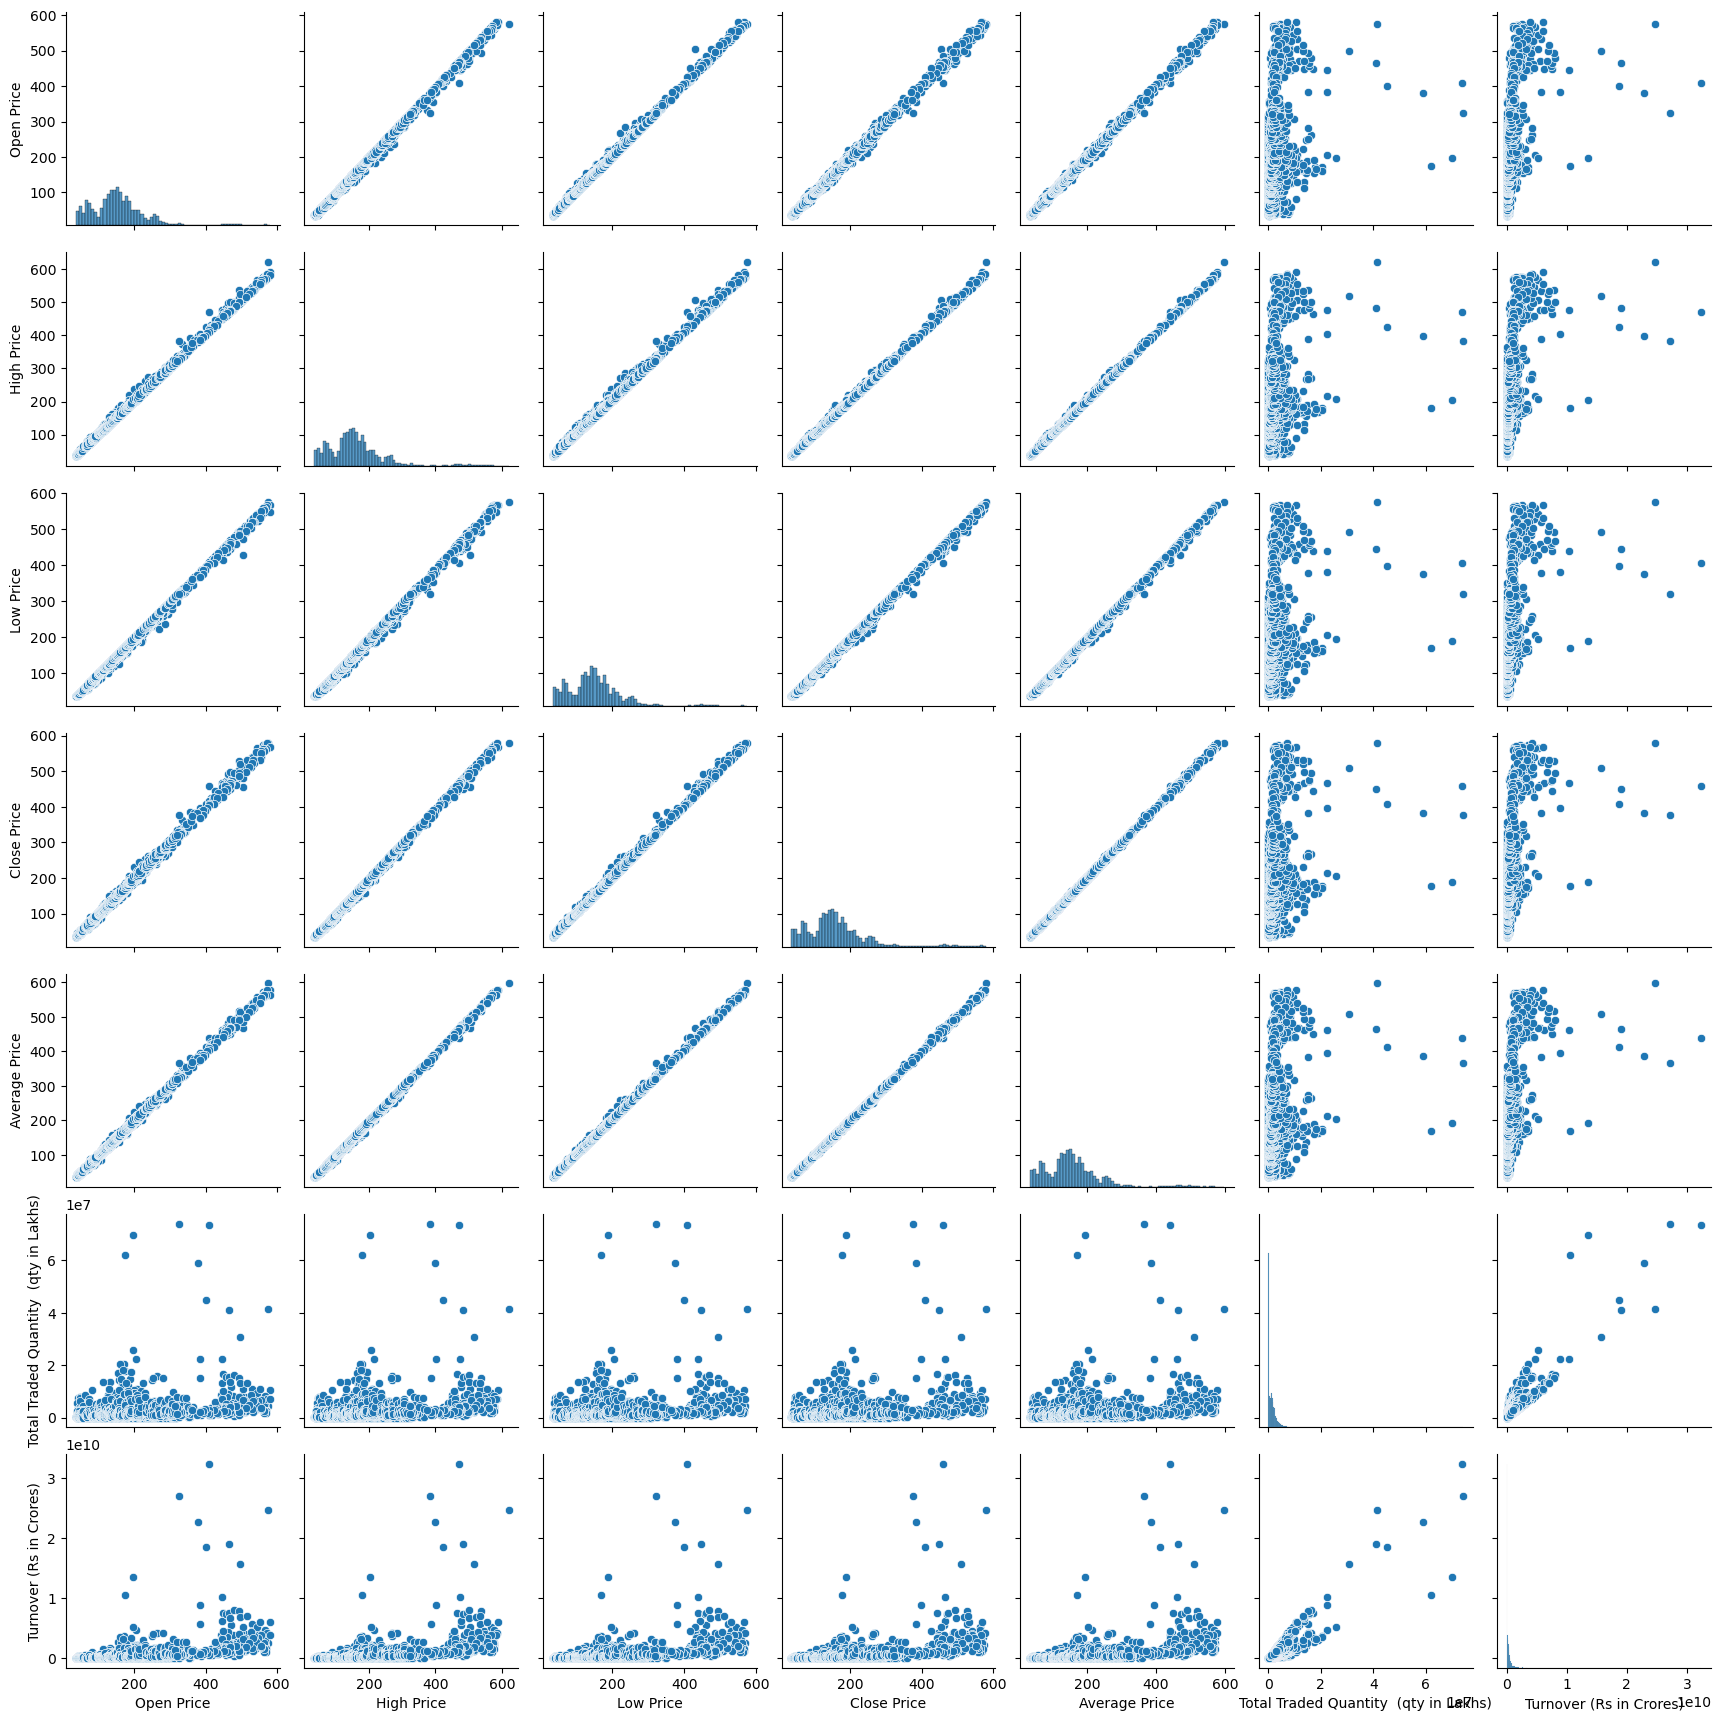

In [12]:
#Exploratory Data Analysis
#For numeric analysis, reduce the dataframe to only numeric values
numeric_df = data2.select_dtypes(include=[np.number])

#Histograms for each numeric column
numeric_cols = numeric_df.columns

#Visualization
sns.pairplot(numeric_df)
plt.show()

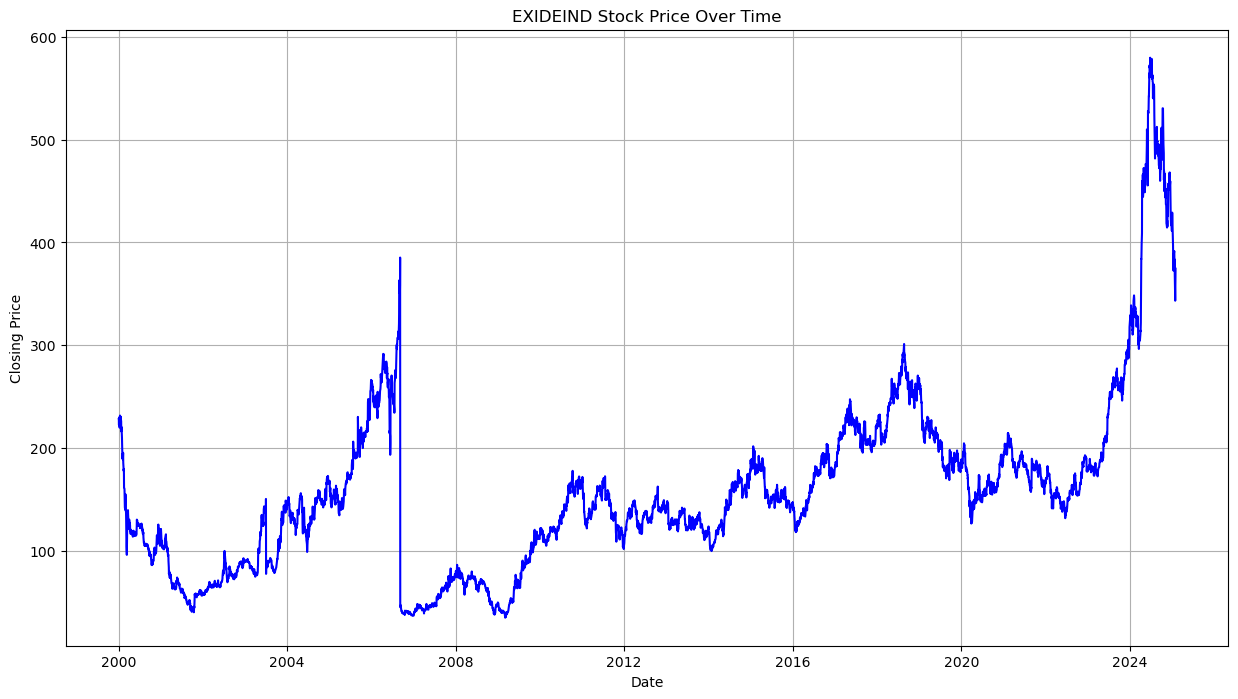

In [13]:
#Line plot to see stock closing price over time
#To ensure proper time series representation
data2 = data2.sort_values(by='Date')
plt.figure(figsize=(15,8))
sns.lineplot(data=data2, x='Date', y='Close Price', color='blue')
plt.title('EXIDEIND Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

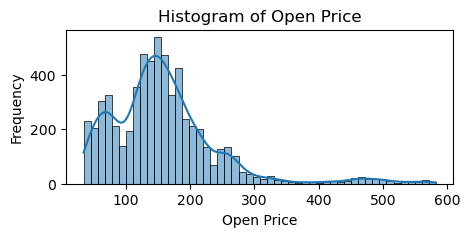

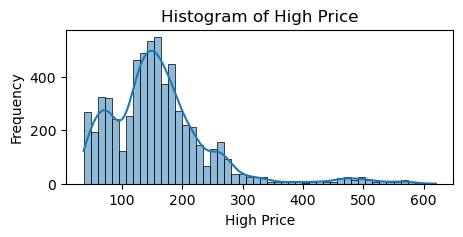

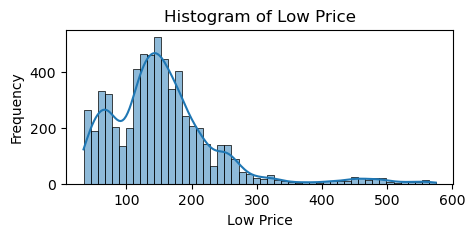

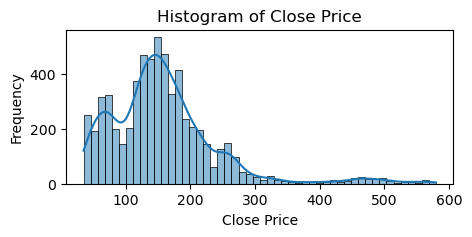

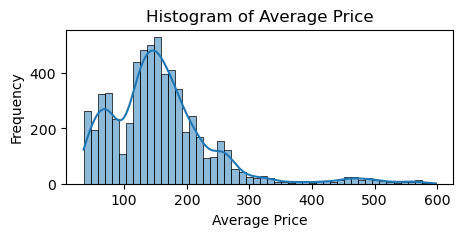

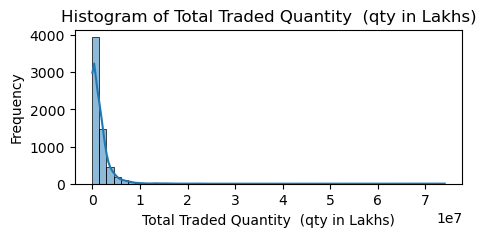

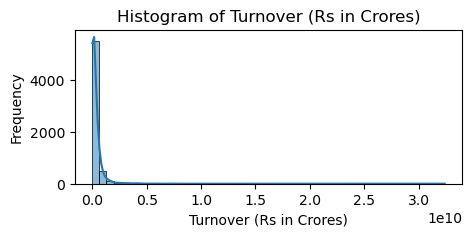

In [14]:
#Histogram for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(5,2))
    sns.histplot(numeric_df[col], kde=True, bins=50)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

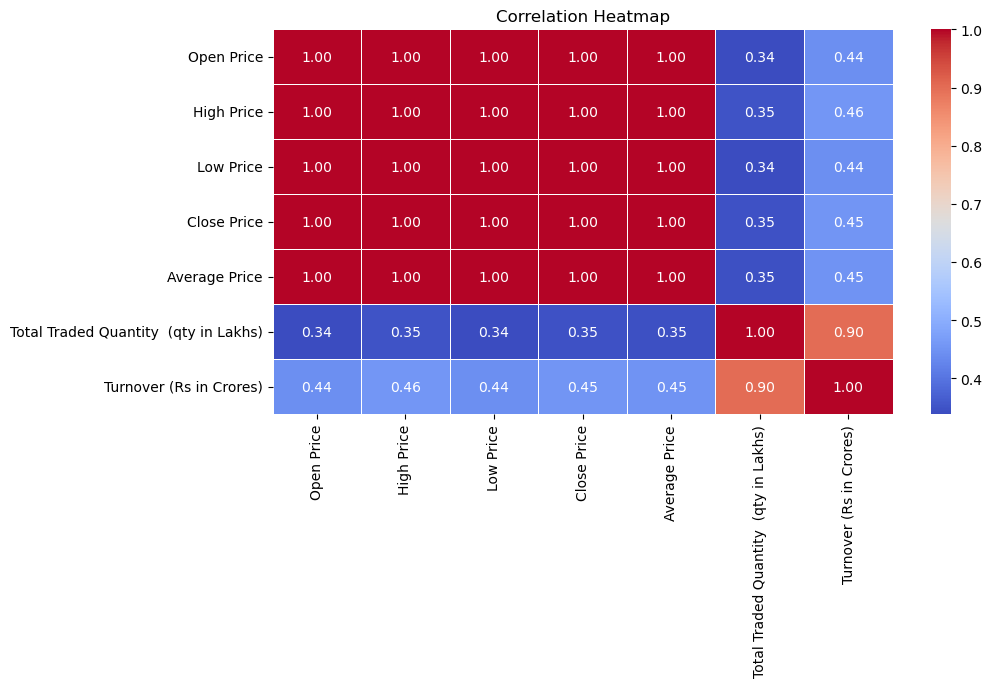

In [15]:
#If there are 4 or more numeric columns, product a correlation heatmap
if numeric_df.shape[1]>=4:
    plt.figure(figsize=(10,5))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

Positive Correlation (~1)

High Price, Low Price, Open Price, Close Price and Average Price are expected to be closely related for daily prices. More quantity traded leads to high turnover.

Negative Correlation (-1)

Increase in traded quantity with decrease in Close Price indicates inverse relationship referring to possible panic selling.

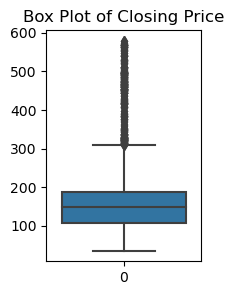

In [16]:
#Box plot for price functuations and trading volume anomalies
plt.figure(figsize=(2,3))
sns.boxplot(data=data2['Close Price'])
plt.title("Box Plot of Closing Price")
plt.show()

If stock has high price jumps it may indicate market events or anomalies.

In [17]:
#Predicting the target, which is stock close price
inputs = ['Open Price', 'High Price', 'Low Price', 'Total Traded Quantity  (qty in Lakhs)', 'Turnover (Rs in Crores)']
target = 'Close Price'
X = data2[inputs]
y = data2[target]

#Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and train the Linear Regression Model
linreg = LinearRegression()
linreg.fit(X_train,y_train)

#Make predictions on test set
predictions = linreg.predict(X_test)

#Caculate performance metrics
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"Model Performance:\nR2 Score is {r2} and Mean Squared Error is {mse}")

Model Performance:
R2 Score is 0.9994461632201388 and Mean Squared Error is 3.8044757260304563


The model performs well where R2 is almost 1 and MSE is very low. However, we need to check for overfitting.

In [18]:
cv_scores = cross_val_score(linreg, X, y, cv=5, scoring='r2')
print(f"Cross-validation R2 Scores: {cv_scores}")
print(f"Mean R2 Score: {cv_scores.mean()}")
print(f"Std Deviation: {cv_scores.std()}")

Cross-validation R2 Scores: [0.99796092 0.9993491  0.99450923 0.9985905  0.99931848]
Mean R2 Score: 0.9979456474467929
Std Deviation: 0.0017932867279704789


Mean R2 indicates strong fit. If Standard Deviation was high (>0.05), it would indicate overfitting. But here the model generalizes well.

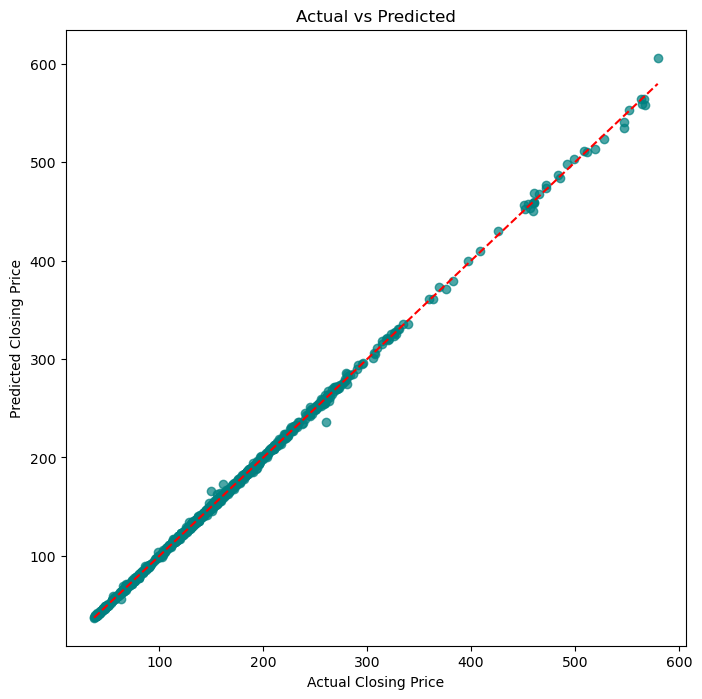

In [19]:
#Visualization: Plot Actual vs Predicted Closing Prices
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions, alpha=0.7, color='teal')
plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()